In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

import math as m

#**Sistema a ser estudado**





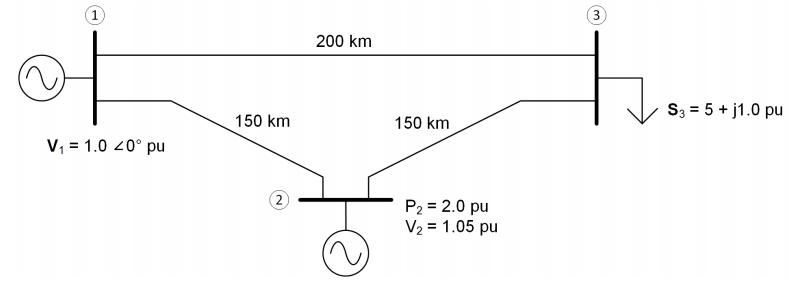

#**Matriz de Admitâncias nodais $[Y]=Y_{ij}$**

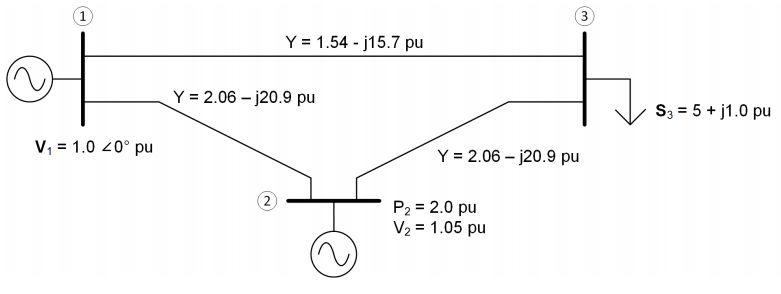

# São dados:

## $V_1=1 \ pu, \delta_1=0°$

## $V_2=1.05 \ pu, P_2=2 \ pu$

## $P_3=-5 \ pu, Q_3=-1 \ pu$

# Temos que obter:

## $\delta_2=?$

## $V_3=?$

## $\delta_3=?$



In [ ]:
V=[1,1.05,1]
Theta=[0,0,0]
Y=np.array([[2],[-5],[-1]])

In [ ]:
Ybus=np.array([[3.6-36.6j,-2.06+20.9j,-1.5+15.7j],[-2.06+20.9j,4.1 - 41.8j,-2.06+20.9j],[-1.5+15.7j,-2.06+20.9j,3.6-36.6j]])

modY=np.array([[36.8,21,15.8],[21,42,21],[15.8,21,36.8]])

ThetaY=np.array([[-84.4,95.6,95.6],[95.6,-84.4,95.6],[95.6,95.6,-84.4]])

ThetaY=ThetaY*m.pi/180

## $P_2=V_2 \displaystyle {\sum_{n=1}^3} |Y_{2n}|V_n \cos(\delta_2-\delta_n-\theta_{2n})    $ 

## $P_3=V_3 \displaystyle {\sum_{n=1}^3} |Y_{3n}|V_n \cos(\delta_3-\delta_n-\theta_{3n})    $ 


## $Q_3=V_3 \displaystyle {\sum_{n=1}^3} |Y_{3n}|V_n \sin(\delta_3-\delta_n-\theta_{3n})    $ 

In [ ]:
def Func(modY,ThetaY,V,Theta):
  P2=0
  P3=0
  Q3=0
  for i in range(3):
    P2+=1.05*modY[1][i]*V[i]*m.cos(Theta[1]-Theta[i]-ThetaY[1][i])
    P3+=V[2]*modY[2][i]*V[i]*m.cos(Theta[2]-Theta[i]-ThetaY[2][i])
    Q3+=V[2]*modY[2][i]*V[i]*m.sin(Theta[2]-Theta[i]-ThetaY[2][i])

  return np.array([[P2],[P3],[Q3]])

## $J=\begin{bmatrix} \dfrac{\partial P_2}{\partial \delta_2} & \dfrac{\partial P_2}{\partial \delta_3} & \dfrac{\partial P_2}{\partial V_3} \\  \dfrac{\partial P_3}{\partial \delta_2} & \dfrac{\partial P_3}{\partial \delta_3} & \dfrac{\partial P_3}{\partial V_3} \\ \dfrac{\partial Q_3}{\partial \delta_2} & \dfrac{\partial Q_3}{\partial \delta_3} & \dfrac{\partial Q_3}{\partial V_3}  \end{bmatrix} $

Em relação a $P_2$:

$\dfrac{\partial P_2}{\partial \delta_2}=-V_2V_1 |Y_{21}| \sin(\delta_2-\delta_1-\theta_{21}) -  V_2V_3 |Y_{23}| \sin(\delta_2-\delta_1-\theta_{23}) $

$\dfrac{\partial P_2}{\partial \delta_3}=V_2V_3 |Y_{23}| \sin(\delta_2-\delta_3-\theta_{23}) $

$\dfrac{\partial P_2}{\partial V_3}=V_2 |Y_{23}| \cos(\delta_2-\delta_3-\theta_{23}) $

Em relação a $P_3$:

$\dfrac{\partial P_3}{\partial \delta_2}= V_3|Y_{32}|V_2 \sin(\delta_3-\delta_2-\theta_{32})     $

$\dfrac{\partial P_3}{\partial \delta_3}=-V_3|Y_{31}|V_1 \sin(\delta_3-\delta_1-\theta_{31})-V_3 |Y_{32}|V_2 \sin(\delta_3-\delta_2-\theta_{32}) $

$\dfrac{\partial P_3}{\partial V_3}=|Y_{31}|V_1 \cos(\delta_3-\delta_1-\theta_{31})+|Y_{32}|V_2 \cos(\delta_3-\delta_2-\theta_{32})+2V_3 |Y_{33}|\cos(\theta_{33}) $


Em relação a $Q_3$:

$\dfrac{\partial Q_3}{\partial \delta_2}=- V_3|Y_{32}|V_2 \cos(\delta_3-\delta_2-\theta_{32})$

$\dfrac{\partial Q_3}{\partial \delta_3}=V_3 |Y_{31}| V_1 \cos(\delta_3-\delta_1-\theta_{31})+V_3 |Y_{32}| V_2 \cos(\delta_3-\delta_2-\theta_{32})    $

$\dfrac{\partial Q_3}{\partial V_3}=|Y_{31}| V_1 \sin (\delta_3-\delta_1-\theta_{31})+|Y_{32}| V_2 \cos(\delta_3-\delta_2-\theta_{32})-2V_3|Y_{33}|\sin(\theta_{33})    $

In [ ]:
def Jacob(modY,ThetaY,V,Theta):

  J11=-V[1]*(modY[1][0]*V[0]*m.sin(Theta[1]-Theta[0]-ThetaY[1][0])+modY[1][2]*V[2]*m.sin(Theta[1]-Theta[2]-ThetaY[1][2]))

  J12=V[1]*modY[1][2]*V[2]*m.sin(Theta[1]-Theta[2]-ThetaY[1][2])

  J13=V[1]*modY[1][2]*m.cos(Theta[1]-Theta[2]-ThetaY[1][2])

  J21=V[2]*modY[2][1]*V[1]*m.sin(Theta[2]-Theta[1]-ThetaY[2][1])

  J22=-V[2]*(modY[2][0]*V[0]*m.sin(Theta[2]-Theta[0]-ThetaY[2][0])+modY[2][1]*V[1]*m.sin(Theta[2]-Theta[1]-ThetaY[2][1]))

  J23=2*V[2]*modY[2][2]*m.cos(ThetaY[2][2])+modY[2][0]*V[0]*m.cos(Theta[2]-Theta[0]-ThetaY[2][0])+modY[2][1]*V[1]*m.cos(Theta[2]-Theta[1]-ThetaY[2][1])

  J31=-V[2]*V[1]*modY[2][1]*m.cos(Theta[2]-Theta[1]-ThetaY[2][1])

  J32=V[2]*(V[0]*modY[2][0]*m.cos(Theta[2]-Theta[0]-ThetaY[2][0])+V[1]*modY[2][1]*m.cos(Theta[2]-Theta[1]-ThetaY[2][1]))

  J33=-2*V[2]*modY[2][2]*m.sin(ThetaY[2][2])+modY[2][0]*V[0]*m.sin(Theta[2]-Theta[0]-ThetaY[2][0])+modY[2][1]*V[1]*m.sin(Theta[2]-Theta[1]-ThetaY[2][1])

  J=np.array([[J11,J12,J13],[J21,J22,J23],[J31,J32,J33]])

  return J

In [ ]:
def Newton(V,Theta,Y,niter):
  
  for i in range(niter):

    F=Func(modY,ThetaY,V,Theta)

    J=Jacob(modY,ThetaY,V,Theta)

    deltaY=Y-F

    DeltaX=np.dot(np.linalg.inv(J),deltaY)

    Theta[1]=DeltaX[0][0]+Theta[1]

    Theta[2]=DeltaX[1][0]+Theta[2]

    V[2]=DeltaX[2][0]+V[2]

  return V,Theta,J

In [ ]:
npontos=260

P3max=19.5

Pinc=5

vec_P3=np.linspace(Pinc,P3max,npontos)

V1=np.ones(npontos)

Theta1=np.ones(npontos)

J1=[]

for i in range(npontos):
  J1.append(np.ones((3, 3)))

In [ ]:
for k in range(npontos):
  V=[1,1.05,1]
  Theta=[0,0,0]
  Y=np.array([[2],[vec_P3[k]],[-1]])
  V_aux,Theta_aux,J_aux=Newton(V,Theta,Y,10)
  V1[k]=V_aux[2]
  Theta1[k]=Theta_aux[2]
  J1[k]=J_aux

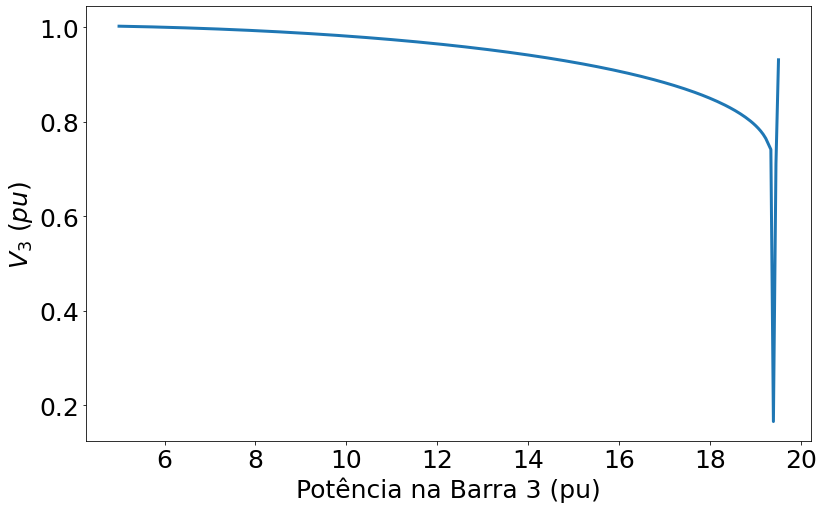

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (13,8))

axis_font = {'fontname':'sans-serif', 'size':'25'}

plt.xlabel('Potência na Barra 3 (pu)',**axis_font)
plt.ylabel(r'$V_3 \ (pu)$',**axis_font)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.plot(vec_P3,V1,linewidth=3.0)

plt.savefig('/content/drive/MyDrive/AlgoritmosDOC/Analises_Tese/PV_barra3.eps', format='eps')

plt.show()

In [ ]:
cond=[]
for j in range(len(J1)):
  cond.append(np.linalg.cond(J1[j]))


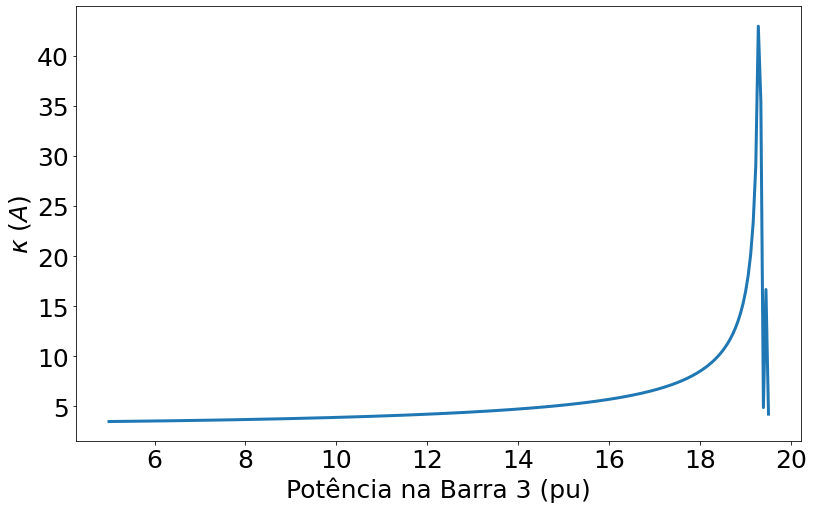

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (13,8))

axis_font = {'fontname':'sans-serif', 'size':'25'}

plt.xlabel('Potência na Barra 3 (pu)',**axis_font)
plt.ylabel(r'$\kappa \ (A)$',**axis_font)
plt.yticks(fontsize=20,**axis_font)
plt.xticks(fontsize=20,**axis_font)

plt.plot(vec_P3,cond,linewidth=3.0)

plt.savefig('/content/drive/MyDrive/AlgoritmosDOC/Analises_Tese/cond_barra3.eps', format='eps')

plt.show()